In [1]:
import gym
import numpy as np
from skimage.transform import resize
import tensorflow as tf
from skimage.color import rgb2gray
from collections import deque
import random
import cv2

In [2]:
env = gym.make("SpaceInvaders-v0")
env = env.unwrapped
env.seed(1)
state = env.reset()

In [3]:
state.shape

(210, 160, 3)

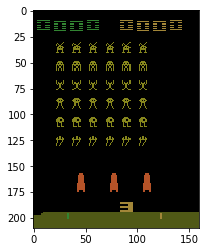

In [4]:
import matplotlib.pyplot as plt
plt.imshow(state)

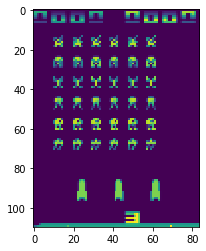

In [5]:
cropped_frame = state[8:-12,4:-12,:]
preprocessed_frame = resize(cropped_frame, [110,84])
old_img_float32 = np.float32(preprocessed_frame)
gray = cv2.cvtColor(old_img_float32, cv2.COLOR_RGB2GRAY)
normalized_frame = gray/255.0
plt.imshow(normalized_frame)

In [6]:
normalized_frame.shape

(110, 84)

In [7]:
action = random.randint(1,env.action_space.n)-1
#action = possible_actions[choice]
next_state, reward, done, _ = env.step(action)

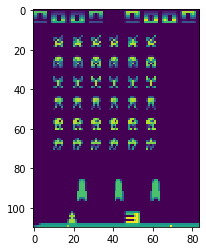

In [8]:
new_cropped_frame = next_state[8:-12,4:-12,:]
new_preprocessed_frame = resize(new_cropped_frame, [110,84])
old_img_float32 = np.float32(new_preprocessed_frame)
new_gray = cv2.cvtColor(old_img_float32, cv2.COLOR_BGR2GRAY)
new_normalized_frame = new_gray/255.0
plt.imshow(new_normalized_frame)

# Optical Flow

In [9]:
flow = cv2.calcOpticalFlowFarneback(new_normalized_frame, normalized_frame, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)

In [10]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

In [12]:
ang.shape

(110, 84)

In [11]:
hsv = np.zeros_like(old_img_float32)
hsv[...,1] = 255
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

In [12]:
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

In [13]:
cv2.imshow('frame2',rgb)

# Image Differentation

In [13]:
from scipy.linalg import norm
from scipy import sum, average

In [15]:
# img1 = new_gray/255
# img2 = new_gray_1/255
    # calculate the difference and its norms
diff = new_normalized_frame - normalized_frame  # elementwise for scipy arrays
m_norm = sum(abs(diff))  # Manhattan norm
z_norm = norm(diff.ravel(), 0)  # Zero norm

/home/sirzech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  """


In [19]:
diff.shape

(110, 84)

In [17]:
z_norm

2087.0